In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import plotly.io as pio 
from plotly.offline import init_notebook_mode, iplot
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
from textblob import TextBlob 
import kaleido as kal

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/'

In [4]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv(os.path.join(path, 'gun_legislation_data.csv'))

In [7]:
df.head(30)

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,ammpermit,ammrecords,ammrestrict,assault,assaultlist,assaultregister,assaulttransfer,backgroundpurge,cap14,cap16,cap18,capaccess,capliability,capunloaded,capuses,ccbackground,ccbackgroundnics,ccrenewbackground,ccrevoke,college,collegeconcealed,danger,dealer,dealerh,defactoreg,defactoregh,drugmisdemeanor,dvro,dvrodating,dvroremoval,dvrosurrender,dvrosurrenderdating,dvrosurrendernoconditions,elementary,exparte,expartedating,expartesurrender,expartesurrenderdating,expartesurrendernoconditions,felony,fingerprint,gunshow,gunshowh,gvro,gvrolawenforcement,immunity,incidentall,incidentremoval,inspection,invcommitment,invoutpatient,junkgun,liability,lockd,locked,lockp,lockstandards,loststolen,magazine,magazinepreowned,mayissue,mcdv,mcdvdating,mcdvremovalallowed,mcdvremovalrequired,mcdvsurrender,mcdvsurrenderdating,mcdvsurrendernoconditions,mentalhealth,microstamp,nosyg,onefeature,onepermonth,opencarryh,opencarryl,opencarrypermith,opencarrypermitl,permit,permitconcealed,permith,permitlaw,personalized,preemption,preemptionbroad,preemptionnarrow,purge,recordsall,recordsallh,recordsdealer,recordsdealerh,registration,registrationh,reportall,reportallh,reportdealer,reportdealerh,residential,security,showing,stalking,statechecks,statechecksh,strawpurchase,strawpurchaseh,tenroundlimit,theft,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,1991,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
1,Alaska,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,California,1991,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,58
5,Colorado,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
6,Connecticut,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
7,Delaware,1991,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12
8,Florida,1991,0,0,0

In [8]:
df2 = pd.read_csv(os.path.join(path, 'gun_violence_data_wrangled2.csv'))

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_11748/3019081490.py:1: DtypeWarning:

Columns (0,22,23) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
df2.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,total,geometry,region,participant_age_dic,participant_type_dic,participant_gender_dic
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4,POINT (-79.8559 40.3467),East,{'0': '20'},"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Male', '1': 'Male', '3': 'Male', '4': '..."
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,1,1,4,POINT (-118.333 33.909),West,{'0': '20'},"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...",{'0': 'Male'}
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1,1,1,4,POINT (-82.1377 41.4455),East,"{'0': '25', '1': '31', '2': '33', '3': '34', '...","{'0': 'Subject-Suspect', '1': 'Subject-Suspect...","{'0': 'Male', '1': 'Male', '2': 'Male', '3': '..."
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1,5,5,4,POINT (-104.802 39.6518),North,"{'0': '29', '1': '33', '2': '56', '3': '33'}","{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Female', '1': 'Male', '2': 'Male', '3':..."
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1,7,0,4,POINT (-79.9569 36.114),East,"{'0': '18', '1': '46', '2': '14', '3': '47'}","{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Female', '1': 'Male', '2': 'Male', '3':..."


In [10]:
df2.count()

incident_id                 239678
date                        239678
state                       239678
city_or_county              239678
address                     223181
n_killed                    239678
n_injured                   239678
congressional_district      239678
gun_stolen                  140180
gun_type                    140227
incident_characteristics    239352
latitude                    231755
location_description         42090
longitude                   231755
n_guns_involved             140227
notes                       158661
participant_age             147380
participant_age_group       197559
participant_gender          203316
participant_status          212052
participant_type            214815
sources                     239069
state_house_district        200906
state_senate_district       207343
year                        239678
month                       239678
monthday                    239678
weekday                     239678
total               

In [11]:
# Merge the DataFrames
merged_df = df2.merge(df, on=['state', 'year'])

In [12]:
merged_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,total,geometry,region,participant_age_dic,participant_type_dic,participant_gender_dic,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,ammpermit,ammrecords,ammrestrict,assault,assaultlist,assaultregister,assaulttransfer,backgroundpurge,cap14,cap16,cap18,capaccess,capliability,capunloaded,capuses,ccbackground,ccbackgroundnics,ccrenewbackground,ccrevoke,college,collegeconcealed,danger,dealer,dealerh,defactoreg,defactoregh,drugmisdemeanor,dvro,dvrodating,dvroremoval,dvrosurrender,dvrosurrenderdating,dvrosurrendernoconditions,elementary,exparte,expartedating,expartesurrender,expartesurrenderdating,expartesurrendernoconditions,felony,fingerprint,gunshow,gunshowh,gvro,gvrolawenforcement,immunity,incidentall,incidentremoval,inspection,invcommitment,invoutpatient,junkgun,liability,lockd,locked,lockp,lockstandards,loststolen,magazine,magazinepreowned,mayissue,mcdv,mcdvdating,mcdvremovalallowed,mcdvremovalrequired,mcdvsurrender,mcdvsurrenderdating,mcdvsurrendernoconditions,mentalhealth,microstamp,nosyg,onefeature,onepermonth,opencarryh,opencarryl,opencarrypermith,opencarrypermitl,permit,permitconcealed,permith,permitlaw,personalized,preemption,preemptionbroad,preemptionnarrow,purge,recordsall,recordsallh,recordsdealer,recordsdealerh,registration,registrationh,reportall,reportallh,reportdealer,reportdealerh,residential,security,showing,stalking,statechecks,statechecksh,strawpurchase,strawpurchaseh,tenroundlimit,theft,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4,POINT (-79.8559 40.3467),East,{'0': '20'},"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Male', '1': 'Male', '3': 'Male', '4': '...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36
1,484268,2013-04-09,Pennsylvania,Philadelphia,Somerset Street and Lee Street,1,3,1,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.9924,NaN,-75.1300,NaN,NaN,0::21||1::18||2::22||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male||4::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.philly.com/philly/blogs/dncrime/Fou...,NaN,NaN,2013,4,9,1,4,POINT (-75.13 39.9924),Unknown,"{'0': '21', '1': '18', '2': '22', '3': '33'}","{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Female', '1': 'Male', '2': 'Male', '3':...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36
2,485885,2013-04-28,Pennsylvania,Che

In [13]:
merged_df.count()

incident_id       222855
date              222855
state             222855
city_or_county    222855
address           207093
                   ...  
violenth          222855
violentpartial    222855
waiting           222855
waitingh          222855
lawtotal          222855
Length: 168, dtype: int64

In [14]:
# Create a new column "percent" by dividing the "Total" column by number of gun laws 
merged_df['percent'] = 100*(merged_df['lawtotal'] / 133)

In [15]:
merged_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,total,geometry,region,participant_age_dic,participant_type_dic,participant_gender_dic,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,ammpermit,ammrecords,ammrestrict,assault,assaultlist,assaultregister,assaulttransfer,backgroundpurge,cap14,cap16,cap18,capaccess,capliability,capunloaded,capuses,ccbackground,ccbackgroundnics,ccrenewbackground,ccrevoke,college,collegeconcealed,danger,dealer,dealerh,defactoreg,defactoregh,drugmisdemeanor,dvro,dvrodating,dvroremoval,dvrosurrender,dvrosurrenderdating,dvrosurrendernoconditions,elementary,exparte,expartedating,expartesurrender,expartesurrenderdating,expartesurrendernoconditions,felony,fingerprint,gunshow,gunshowh,gvro,gvrolawenforcement,immunity,incidentall,incidentremoval,inspection,invcommitment,invoutpatient,junkgun,liability,lockd,locked,lockp,lockstandards,loststolen,magazine,magazinepreowned,mayissue,mcdv,mcdvdating,mcdvremovalallowed,mcdvremovalrequired,mcdvsurrender,mcdvsurrenderdating,mcdvsurrendernoconditions,mentalhealth,microstamp,nosyg,onefeature,onepermonth,opencarryh,opencarryl,opencarrypermith,opencarrypermitl,permit,permitconcealed,permith,permitlaw,personalized,preemption,preemptionbroad,preemptionnarrow,purge,recordsall,recordsallh,recordsdealer,recordsdealerh,registration,registrationh,reportall,reportallh,reportdealer,reportdealerh,residential,security,showing,stalking,statechecks,statechecksh,strawpurchase,strawpurchaseh,tenroundlimit,theft,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal,percent
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4,POINT (-79.8559 40.3467),East,{'0': '20'},"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Male', '1': 'Male', '3': 'Male', '4': '...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669
1,484268,2013-04-09,Pennsylvania,Philadelphia,Somerset Street and Lee Street,1,3,1,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.9924,NaN,-75.1300,NaN,NaN,0::21||1::18||2::22||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male||4::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.philly.com/philly/blogs/dncrime/Fou...,NaN,NaN,2013,4,9,1,4,POINT (-75.13 39.9924),Unknown,"{'0': '21', '1': '18', '2': '22', '3': '33'}","{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Female', '1': 'Male', '2': 'Male', '3':...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669
2,485885

In [16]:
# Save the DataFrame as a CSV file
merged_df.to_csv("gun_laws_merged.csv", index=False)

In [39]:
# Dropping rows with year 2018
merged_df = merged_df[merged_df['year'] != 2018]

In [47]:
# Dropping rows with District of Columbia
merged_df = merged_df[merged_df['state'] != 'District of Columbia' ]

In [50]:
merged_df

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,ammpermit,ammrecords,ammrestrict,assault,assaultlist,assaultregister,assaulttransfer,backgroundpurge,cap14,cap16,cap18,capaccess,capliability,capunloaded,capuses,ccbackground,ccbackgroundnics,ccrenewbackground,ccrevoke,college,collegeconcealed,danger,dealer,dealerh,defactoreg,defactoregh,drugmisdemeanor,dvro,dvrodating,dvroremoval,dvrosurrender,dvrosurrenderdating,dvrosurrendernoconditions,elementary,exparte,expartedating,expartesurrender,expartesurrenderdating,expartesurrendernoconditions,felony,fingerprint,gunshow,gunshowh,gvro,gvrolawenforcement,immunity,incidentall,incidentremoval,inspection,invcommitment,invoutpatient,junkgun,liability,lockd,locked,lockp,lockstandards,loststolen,magazine,magazinepreowned,mayissue,mcdv,mcdvdating,mcdvremovalallowed,mcdvremovalrequired,mcdvsurrender,mcdvsurrenderdating,mcdvsurrendernoconditions,mentalhealth,microstamp,nosyg,onefeature,onepermonth,opencarryh,opencarryl,opencarrypermith,opencarrypermitl,permit,permitconcealed,permith,permitlaw,personalized,preemption,preemptionbroad,preemptionnarrow,purge,recordsall,recordsallh,recordsdealer,recordsdealerh,registration,registrationh,reportall,reportallh,reportdealer,reportdealerh,residential,security,showing,stalking,statechecks,statechecksh,strawpurchase,strawpurchaseh,tenroundlimit,theft,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal,incident_id,date,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,month,monthday,weekday,total,geometry,region,participant_age_dic,participant_type_dic,participant_gender_dic,percent
0,Pennsylvania,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,36.0,461105,2013-01-01,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.855900,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,1,1,1,4,POINT (-79.8559 40.3467),East,{'0': '20'},"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': 'Male', '1': 'Male', '3': 'Male', '4': '...",27.067669
1,California,2013,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99.0,460726,2013-01-01,Hawthorne,13500 block of Cerise Avenue,1,3,43,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (

In [51]:
merged_df.dtypes

state                      object
year                        int64
age18longgunpossess       float64
age18longgunsale          float64
age21handgunpossess       float64
                           ...   
region                     object
participant_age_dic        object
participant_type_dic       object
participant_gender_dic     object
percent                   float64
Length: 169, dtype: object

In [71]:
# Convert 'value' column to int
merged_df['percent'] = merged_df['percent'].astype(int)

## Create scatterplot

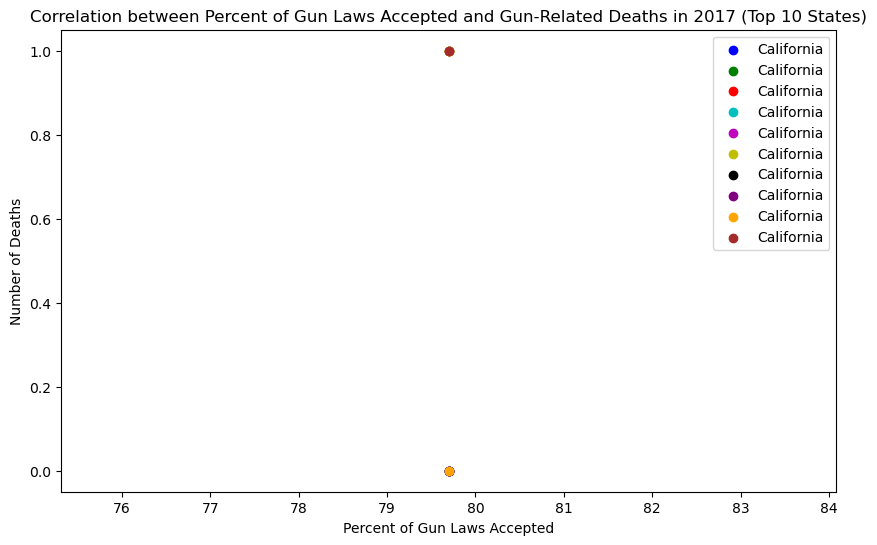

In [120]:
# Sort the data by percent (in descending order) and select the top ten states
top_ten_states = merged_df_2017.nlargest(10, 'percent')

# Extract the required columns
percent_accepted = top_ten_states['percent']
deaths_2017 = top_ten_states['n_killed']

# Define a list of unique colors for each state
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'brown']

# Create a scatter plot with different colors and labels
plt.figure(figsize=(10, 6))
for i, (x, y, state) in enumerate(zip(percent_accepted, deaths_2017, top_ten_states['state'])):
    plt.scatter(x, y, color=colors[i], label=state)

# Add labels and title
plt.xlabel('Percent of Gun Laws Accepted')
plt.ylabel('Number of Deaths')
plt.title('Correlation between Percent of Gun Laws Accepted and Gun-Related Deaths in 2017 (Top 10 States)')

# Add legend
plt.legend()

# Show the plot
plt.show()

IndexError: single positional indexer is out-of-bounds

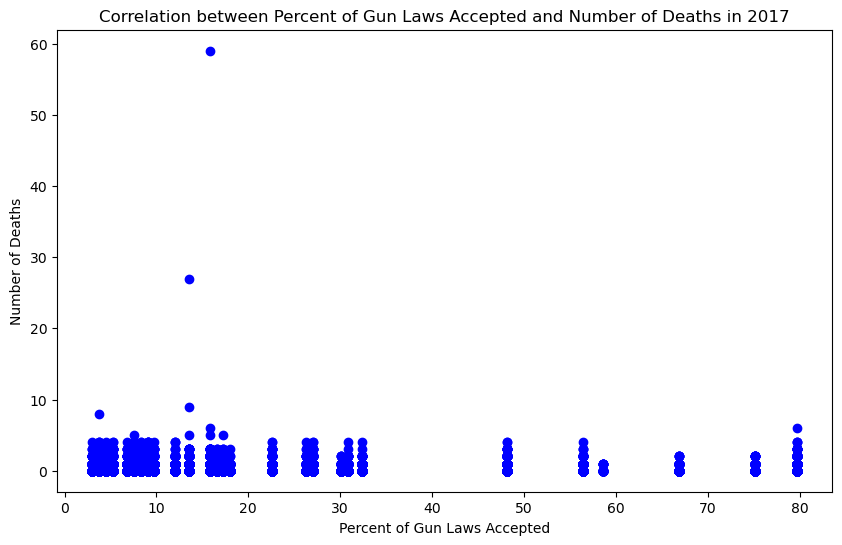

In [136]:
# Filter the data for the year 2017
merged_df_2017 = merged_df[merged_df['year'] == 2017]

# Extract the required columns
percent_accepted = merged_df_2017['percent']
deaths_2017 = merged_df_2017['n_killed']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(percent_accepted, deaths_2017, color='blue')

# Add labels and title
plt.xlabel('Percent of Gun Laws Accepted')
plt.ylabel('Number of Deaths')
plt.title('Correlation between Percent of Gun Laws Accepted and Number of Deaths in 2017' )

# Identify the indices with the highest number of deaths
top_deaths_indices = deaths_2017.nlargest(5).index

# Add labels for the top points
for i in top_deaths_indices:
    state_name = merged_df_2017['state'].iloc[i]  # Corrected to use merged_df_2017
    plt.annotate(state_name, (percent_accepted.iloc[i], deaths_2017.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

In [137]:
# Save the DataFrame as a CSV file
merged_df_2017.to_csv("gun_laws_merged_2017.csv", index=False)

In [131]:
# Save the plot as a JPEG file
plt.savefig('deaths_percent_scatter.jpg', format='jpeg', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>